### Objective

Develop a recommendation system that recommends similar items to the item that the user choose. 

### Import and Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Import Data

In [2]:
product_data = pd.read_csv("../data/external/"
                           "2021June-July_product_data.csv")
review_data = pd.read_csv("../data/external/"
                          "2021June-July_review_data.csv")

### Eplore Data and Process Data

#### Explore and Process Product Data

In [3]:
product_data.shape

(1583, 33)

In [4]:
product_data.columns

Index(['pk_product', 'date_collected', 'product_itemid', 'product_shopid',
       'product_category', 'product_name', 'product_price',
       'product_price_min', 'product_price_max', 'product_discount',
       'product_brand', 'product_like_count', 'product_comment_count',
       'product_views', 'prod_rate_star_0', 'prod_rate_star_1',
       'prod_rate_star_2', 'prod_rate_star_3', 'prod_rate_star_4',
       'prod_rate_star_5', 'product_total_rating', 'stock', 'units_sold',
       'status', 'shop_location', 'shop_is_on_flash_sale',
       'shop_is_preferred_plus_seller', 'feature_lowest_price_guarantee',
       'feature_can_use_bundle_deal', 'feature_can_use_cod',
       'feature_can_use_wholesale', 'feature_show_free_shipping',
       'product_variation_count'],
      dtype='object')

In [5]:
with pd.option_context("display.max_columns", None):
    display(product_data.sample(2))

,pk_product,date_collected,product_itemid,product_shopid,product_category,product_name,product_price,product_price_min,product_price_max,product_discount,product_brand,product_like_count,product_comment_count,product_views,prod_rate_star_0,prod_rate_star_1,prod_rate_star_2,prod_rate_star_3,prod_rate_star_4,prod_rate_star_5,product_total_rating,stock,units_sold,status,shop_location,shop_is_on_flash_sale,shop_is_preferred_plus_seller,feature_lowest_price_guarantee,feature_can_use_bundle_deal,feature_can_use_cod,feature_can_use_wholesale,feature_show_free_shipping,product_variation_count
203,202106131488095772,2021-06-13,1488095772,36222507,Long Sleeves,Classic Knitted V Neck Long Sleeve Formal Blou...,175.0,140,140,20,No Brand,51,30,924,29,0,0,0,1,30,4.87,796,61,1,"Pasay City, Metro Manila",0,0,0,0,0,0,1,15
308,202106137381504968,2021-06-13,7381504968,39345649,Crop Top,Rosé adidas aesthetic slim top• korean aesthet...,NaN,68,68,0,No Brand,440,272,5977,251,14,3,1,2,271,4.89,3052,979,1,"Navotas City, Metro Manila",0,0,0,0,0,0,0,7


In [6]:
kept_product_features = ["product_itemid", "product_name", "product_category", "product_price", 
                         "product_discount", "product_like_count", "product_comment_count", 
                         "product_views", "product_total_rating", "units_sold"]
# discard rows with missing values 
kept_product_data = product_data[kept_product_features].dropna().reset_index(drop=True)

In [7]:
# get product dataframe based on products primary key pk_product-> product_itemid
# limit the product data to selected fields
features = ["product_price", "product_discount", "product_like_count",
                "product_comment_count", "product_views", "product_total_rating", "units_sold"]
agg_product_features = ["avg_product_price", "avg_product_discount", "sum_product_like_count",
                "sum_product_comment_count", "sum_product_views", "avg_product_total_rating", 
                        "sum_units_sold"]
agg_funs = ["mean","mean","sum", "sum", "sum", "mean", "sum"]

aggregation_dict = dict(zip(features, agg_funs))
columns_dict = dict(zip(features, agg_product_features))

agg_product_df = kept_product_data.groupby(["product_itemid", "product_category", "product_name"], 
                                           as_index=False) \
                                  .agg(aggregation_dict) \
                                  .rename(columns=columns_dict)\
                                  .drop_duplicates(["product_itemid"])

array([[<AxesSubplot:title={'center':'product_itemid'}>,
        <AxesSubplot:title={'center':'avg_product_price'}>,
        <AxesSubplot:title={'center':'avg_product_discount'}>],
       [<AxesSubplot:title={'center':'sum_product_like_count'}>,
        <AxesSubplot:title={'center':'sum_product_comment_count'}>,
        <AxesSubplot:title={'center':'sum_product_views'}>],
       [<AxesSubplot:title={'center':'avg_product_total_rating'}>,
        <AxesSubplot:title={'center':'sum_units_sold'}>, <AxesSubplot:>]],
      dtype=object)

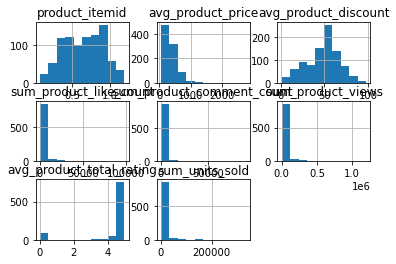

In [8]:
agg_product_df.hist()

<AxesSubplot:>

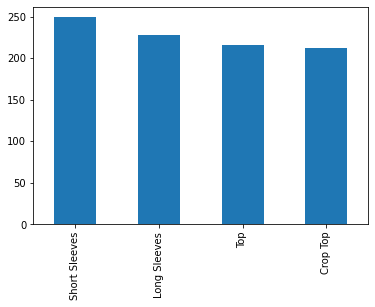

In [9]:
agg_product_df["product_category"].value_counts().plot(kind="bar")

#### Explore and Process Review Data

In [10]:
review_data.shape

(51279, 22)

In [11]:
review_data.columns

Index(['pk_review', 'date_collected', 'cmtid', 'itemid', 'shopid',
       'author_username', 'comment', 'rating_star', 'no_tag',
       'pos_good_quality', 'pos_excellent_quality', 'pos_very_accomodating',
       'pos_well_packaged', 'pos_item_shipped_immediately',
       'pos_will_order_again', 'neg_defective', 'neg_did_not_receive_item',
       'neg_damaged_packaging', 'neg_will_not_order_again', 'neg_rude_seller',
       'neg_item_shipped_late', 'neg_item_different_from_picture'],
      dtype='object')

In [12]:
review_data.nunique()

pk_review                          51279
date_collected                         4
cmtid                              33564
itemid                               950
shopid                               367
author_username                    21026
comment                            20185
rating_star                            5
no_tag                                 2
pos_good_quality                       1
pos_excellent_quality                  2
pos_very_accomodating                  2
pos_well_packaged                      1
pos_item_shipped_immediately           2
pos_will_order_again                   2
neg_defective                          1
neg_did_not_receive_item               1
neg_damaged_packaging                  1
neg_will_not_order_again               1
neg_rude_seller                        2
neg_item_shipped_late                  2
neg_item_different_from_picture        1
dtype: int64

In [13]:
with pd.option_context("display.max_columns", None):
    display(review_data.sample(2))

,pk_review,date_collected,cmtid,itemid,shopid,author_username,comment,rating_star,no_tag,pos_good_quality,pos_excellent_quality,pos_very_accomodating,pos_well_packaged,pos_item_shipped_immediately,pos_will_order_again,neg_defective,neg_did_not_receive_item,neg_damaged_packaging,neg_will_not_order_again,neg_rude_seller,neg_item_shipped_late,neg_item_different_from_picture
11220,202106134584386770,2021-06-13,4584386770,4942096740,258468274,jloveonline,NaN,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0
14273,202106215105497823,2021-06-21,5105497823,4840459112,55748694,b*****s,Sakto ang quality sa price. Trendy ang designs...,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [14]:
# limit review data to selected fields
kept_review_data = review_data[["cmtid", "itemid", "rating_star"]].dropna().reset_index()

In [15]:
# only keep reviews with existing products
kept_review_data = review_data[review_data["itemid"] \
                               .isin(agg_product_df["product_itemid"])]

In [16]:
# review data summary
n_ratings = len(kept_review_data)
n_movies = len(kept_review_data["itemid"].unique())
n_users = len(kept_review_data["cmtid"].unique())

print(f"Number of ratings: {n_ratings}")
print(f"Number of unique itemid's: {n_movies}")
print(f"Number of unique users: {n_users}")
print(f"Average ratings per user: {round(n_ratings/n_users, 2)}")
print(f"Average ratings per movie: {round(n_ratings/n_movies, 2)}")

Number of ratings: 45932
Number of unique itemid's: 826
Number of unique users: 29782
Average ratings per user: 1.54
Average ratings per movie: 55.61


In [17]:
# Calculate mean ratings for each item
mean_rating = kept_review_data.groupby("itemid")[["rating_star"]].mean()

In [18]:
# Lowest rated products
lowest_rated = mean_rating["rating_star"].idxmin()
agg_product_df.loc[agg_product_df["product_itemid"] == lowest_rated]

,product_itemid,product_category,product_name,avg_product_price,avg_product_discount,sum_product_like_count,sum_product_comment_count,sum_product_views,avg_product_total_rating,sum_units_sold
485,6887799434,Short Sleeves,Korean style V-neck chic single-breasted waist...,544.0,35.0,116,2,1209,1.0,6


In [19]:
# Highest rated movies
highest_rated = mean_rating["rating_star"].idxmax()
agg_product_df.loc[agg_product_df["product_itemid"] == highest_rated]

,product_itemid,product_category,product_name,avg_product_price,avg_product_discount,sum_product_like_count,sum_product_comment_count,sum_product_views,avg_product_total_rating,sum_units_sold
2,706814827,Long Sleeves,Korean Women Long Sleeved Shirt Stretch Base B...,230.0,20.0,2457,678,61,4.58,2131


### Fit Model

In [20]:
from scipy.sparse import csr_matrix
pt = kept_review_data.pivot_table(index="itemid",columns="cmtid", 
                                  values="rating_star", fill_value=0)
X = csr_matrix(pt)

In [21]:
# Fit model
k=8
from sklearn.neighbors import NearestNeighbors
model = NearestNeighbors(n_neighbors=k, algorithm="brute", metric="cosine")
model.fit(X)

NearestNeighbors(algorithm='brute', metric='cosine', n_neighbors=8)

In [22]:
neighbors = model.kneighbors(X, return_distance=False)
columns = ["input_itemid", "rank", "recommend_itemid", "recommend_category",
          "recommend_name", "recommend_avg_price", "recommend_avg_discount",
          "recommend_like_count", "recommend_comment_count", "recommend_product_views",
          "recommend_avg_rating", "recommend_avg_rating"]
recommendations = pd.DataFrame(columns=columns)

unique_items = np.unique(agg_product_df["product_itemid"])
item_inv_mapper = dict(zip(list(range(len(unique_items))), unique_items))

In [23]:
for i in range(len(neighbors)):
    for j in range(1, k):
        n = neighbors[i].item(j)
        itemid = item_inv_mapper[i]
        recommend_itemid = item_inv_mapper[n]
        product_info = agg_product_df.loc[agg_product_df["product_itemid"] == recommend_itemid] \
        .values.tolist()[0]
        recommendations.loc[j+k*i] = [itemid, j] + product_info

recommendations

,input_itemid,rank,recommend_itemid,recommend_category,recommend_name,recommend_avg_price,recommend_avg_discount,recommend_like_count,recommend_comment_count,recommend_product_views,recommend_avg_rating,recommend_avg_rating
1,674045966,1,7589366746,Short Sleeves,korean fashion knitted Round neck blouse top s...,300.0,18.0,23,11,1452,5.00,112
2,674045966,2,7658961697,Short Sleeves,korean fashion knitted blouse knitted top shor...,300.0,67.0,80,160,1060,4.93,419
3,674045966,3,7641709091,Short Sleeves,korean fashion knitted blouse MICKEY top short...,199.0,67.0,101,35,340,4.83,76
4,674045966,4,7635156435,Long Sleeves,COD & Ready stock Korean Top Fashion Square Co...,515.0,56.0,456,259,878,4.88,671
5,674045966,5,7563770506,Long Sleeves,Chiffon Korean-Style off-Shoulder Long Sleeve ...,480.0,41.0,4636,635,20093,4.93,1318
...,...,...,...,...,...,...,...,...,...,...,...,...
6603,9809157319,3,7641709091,Short Sleeves,korean fashion knitted blouse MICKEY top short...,199.0,67.0,101,35,340,4.83,76
6604,9809157319,4,7635156435,Long Sleeves,COD & Ready stock Korean Top Fashion Square Co...,515.0,56.0,456,259,878,4.88,671
6605,9809157319,5,7563770506,Long Sleeves,Chiffon Korean-Style off-Shoulder Long Sleeve ...,480.0,41.0,4636,635,20093,4.93,1318
6606,9809157319,6,7582713454,Long Sleeves,Kathryn Korean Trend Long Sleeve Croptop 11176#,299.0,77.0,11031,1338,120161,4.83,3478


In [24]:
recommendations = recommendations.reset_index(drop=True)

<AxesSubplot:>

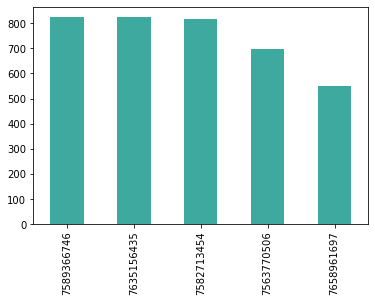

In [36]:
recommendations["recommend_itemid"].value_counts().head(5).plot(kind="bar", color="#3EA99F")